<a href="https://colab.research.google.com/github/wellCh4n/pokemon-diffusers/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/huggingface/diffusers
!pip install ./diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 48628, done.
remote: Counting objects: 100% (1547/1547), done.
remote: Compressing objects: 100% (691/691), done.
remote: Total 48628 (delta 1089), reused 1143 (delta 789), pack-reused 47081
Receiving objects: 100% (48628/48628), 31.57 MiB | 21.86 MiB/s, done.
Resolving deltas: 100% (35872/35872), done.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.24.0.dev0-py3-none-any.whl size=1700256 sha256=bb0c73dc789d2987aad65b47ac38fdf54ba0714d7d2af96823fddd223274b299
  Stored in directory: /tmp/pip-ephem-wheel-cache-md08ltji/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers


In [3]:
!pip install -r /content/diffusers/examples/text_to_image/requirements.txt

In [ ]:
import os
os.kill(os.getpid(), 9)

In [5]:
!accelerate launch --mixed_precision="fp16" /content/diffusers/examples/text_to_image/train_text_to_image_lora.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" \
  --dataset_name="lambdalabs/pokemon-blip-captions" --caption_column="text" \
  --resolution=512 --random_flip \
  --train_batch_size=2 \
  --num_train_epochs=5 --checkpointing_steps=5000 \
  --learning_rate=1e-04 --lr_scheduler="constant" --lr_warmup_steps=0 \
  --seed=42 \
  --output_dir="sd-pokemon-model-lora" \
  --validation_prompt="cute dragon creature"

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
11/23/2023 15:30:35 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'clip_sample_range', 'sample_max_value', 'timestep_spacing', 'thresholding', 'variance_type', 'dynamic_thresholding_ratio', 'prediction_type'} was not found in config. Values will be initialized to default values.
{'norm_num_groups', 'force_upcast'} was not found in config. Values will be initialized to default values.
{'cross_attention_norm', 'projection_class_embeddings_input_dim', 'resnet_time_scale_shift', 'time_cond_proj_dim', 'time_embedding_type', 'mid_block_only_cross_attention', 'class

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/30 [00:00<?, ?it/s]

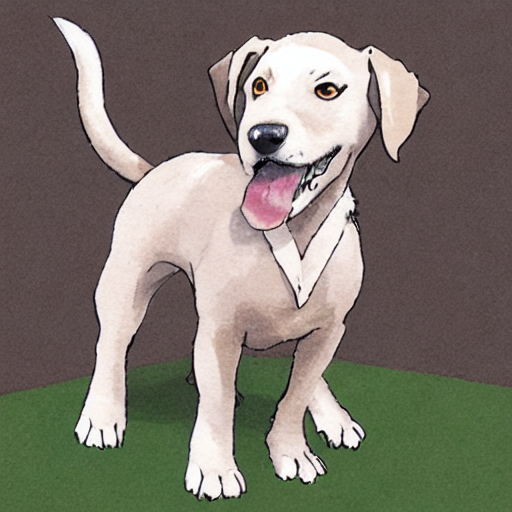

In [11]:
from diffusers import StableDiffusionPipeline
import torch

model_path = "/content/sd-pokemon-model-lora/pytorch_lora_weights.safetensors"
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe.unet.load_attn_procs(model_path)
pipe.to("cuda")

prompt = "a dog with green eyes and red legs."
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5,seed=10).images[0]
image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/30 [00:00<?, ?it/s]

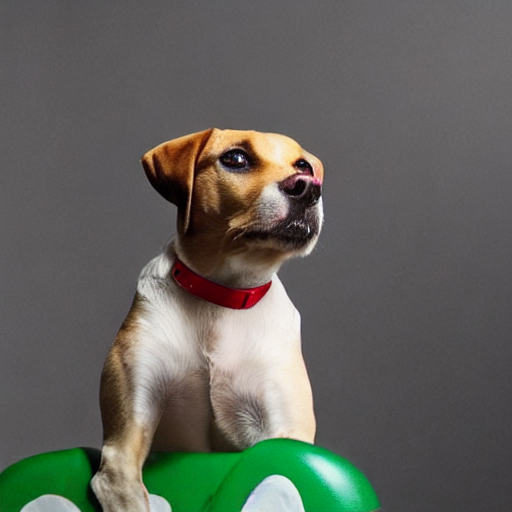

In [21]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe.to("cuda")

generator = torch.Generator(device="cuda").manual_seed(87)
prompt = "a dog with green eyes and red legs."
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5, generator=generator).images[0]
image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/30 [00:00<?, ?it/s]

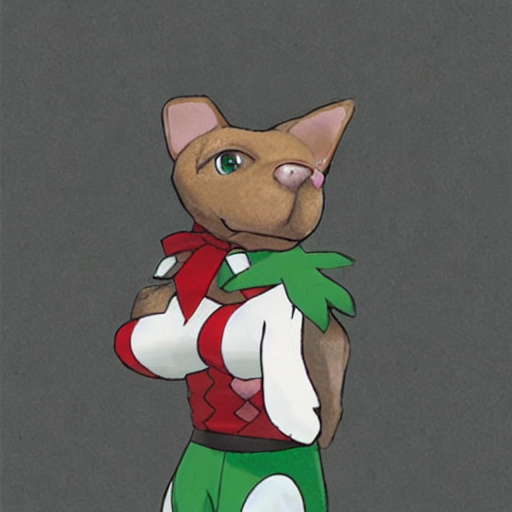

In [22]:
model_path = "/content/sd-pokemon-model-lora/pytorch_lora_weights.safetensors"
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe.unet.load_attn_procs(model_path)
pipe.to("cuda")

prompt = "a dog with green eyes and red legs."
generator = torch.Generator(device="cuda").manual_seed(87)
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5, generator=generator).images[0]
image